<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

참고 자료
- 
-
-

# Pandas와 Numpy

1. 저장소 제목이 ML(Machine Learning)이지만 pandas와 numpy가 먼저 나오는 이유
 - 데이터를 다루기 위해 필수적으로 라이브러리들이라 생각되기 때문
 - 정형 데이터를 다루고 하는데 요긴함
 - 물론 비정형 데이터는 다를 수 있음
 - 이후의 머신러닝에서도 실습할 수 있게 유명한 데이터중 하나인 타이타닉 데이터(캐클)를 다운 받음
 - 여기서는 다운받은 파일 중에서는 train 데이터로만 실습 예정
 - 이후 머신 러닝을 하는데 사용할 거기 때문에 바로 전처리도 다룰 예정

2. Pandas 란
 - 데이터분석 라이브러리
 - 흔히 말하는, 데이터 프레임을 만들어서 데이터를 처리할 수 있음.
 - 보통 numpy와 같이 쓰임.

3. numpy 란
 - Array 연산을 할때 사용하며 대부분 표준 라이브러리로 사용
 - 그 외 다양한 기능을 가진 라이브러리

## 설치와 확인

In [2]:
# 설치
%pip install pandas
%pip install numpy

You should consider upgrading via the 'c:\Users\82108\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\82108\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
# 흔히 많이 import 하는 방식
import pandas as pd
import numpy as np

In [6]:
# 잘 import 되었는지 확인
print(pd)
print(np)

<module 'pandas' from 'c:\\Users\\82108\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>
<module 'numpy' from 'c:\\Users\\82108\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\numpy\\__init__.py'>


## 파일 불러오기 및 확인

- 아마 대부분의 정형 데이터를 처리할 때, csv 파일을 사용할거라고 생각됨
- 타이타닉 데이터도 csv파일로 되어있기 때문에 이를 불러와서 사용
- 형태 (<>이부분은 필요에 따라 사용)
  > 변수명 = pd.read_csv("파일 경로"<, encoding = "",  header = 0, engine = 'python', sep='|', index_col=0>)
- 여기서 확인하는 것 (파일은 잘 불러왔는지?, 파일은 어떤 형태로 되어있는지?)

In [3]:
# 파일 불러오기 #
# 사용하는 디렉토리가 같다면, 파일명만으로 실행 가능 
titanic_csv = pd.read_csv("titanic_train.csv")

## encoding = ""       # utf-8 처럼 적절한 인코딩 사용
## header = 0          # 변수 이름 
## engine = 'python'   # 활용 프로그램
## sep='|'             # 구분자
## index_col=0         # 행의 인덱스 구분

In [9]:
# 파일 확인 1 #
# 행과 열의 형태가 나옴
titanic_csv.shape

(891, 12)

In [16]:
# 데이터의 변수명 확인
titanic_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# 데이터의 초기 5개 값 확인 #
titanic_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터의 마지막 5개 값 확인 #
titanic_csv.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
# 데이터 변수들의 타입과 결측치 등을 확인 #
titanic_csv.info()

## 나이 
## Cabin
## 이 2가지에서 결측치 발견 (추후, 결측치 처리)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# 타입만 확인 #
titanic_csv.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 데이터 확인 및 EDA(탐색적 데이터 분석)

즉, 전처리를 하겠다는 말이다.
- 필요없는 변수 제거
- 결측치 처리
- 필요한 변수 추가
- 필요에 따라 외부 자료와 새로운 변수 매핑

### 결측치 처리

결측치를 처리하는 방법은 여러가지가 존재함. 크게 보았을 때, 2가지로 보임
- 결측치를 없애는 방법 (없애는 것도 경우를 따지면서 삭제)
- 결측치를 채우는 방법 (평균으로 채우는 등 다양한 방법 존재)

1. Age(나이) : 약 200개의 결측치 존재
   > 이름에 "Mr.", "Ms." 등의 존칭을 붙임.\
   > 칭의 평균으로 결측치를 채우는게 합당해보임.

2. Cabin(수하물 번호) : 약 700개의 결측치 존재
   > 과연 수하물의 번호가 생존에 영향을 줄 수 있는지 고민.\
   > 영향을 주기 힘들다고 판단 => 변수 자체를 제거해도 괜찮아보임.

#### Age 결측치 처리과정

- 이름을 FN(First name 성), LN(Last name 이름), ToH(title of honor 존칭)으로 나누기
- 나누어진 새로운 변수 3개를 맵핑
- 존칭의 평균으로 결측치를 채우기

In [23]:
# Age만 따로 확인
age = titanic_csv["Age"]

age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Matplotlib is building the font cache; this may take a moment.


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

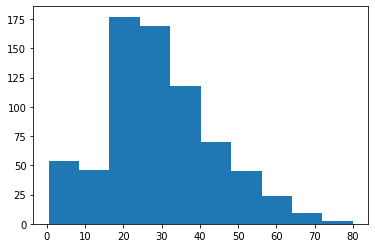

In [24]:
# 결측

### 필요없는 변수 제거

- 상관분석

1. PassengerId : 탑승객 번호 (인덱스번호)
2. Survived : 생존 여부 (0 = 사망, 1 = 생존)
3. Pclass : 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
4. Name : 이름
5. Sex : 성별
6. Age : 나이
7. SibSp : 함께 탑승한 자녀 / 배우자의 수
8. Parch : 함께 탑승한 부모님 / 아이들의 수
9. Ticket : 티켓 번호
10. Fare : 탑승 요금
11. Cabin : 수하물 번호
12. Embarked : 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
# 타이타닉 데이터는 결국 생존 여부를 판단하는 데이터 #
# 결국 이 변수가 생존에 영향을 줄 것인가를 판단

## PassengerId(인덱스 번호) 필요없다고 판단
# 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# 데이터 셋을 간단히 분석 #
titanic_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 필요한 변수 추가

### 외부 변수 및 새로운 변수 매핑

ex) 법정동 변수에 읍면동 변수 매핑